In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
from tqdm.auto import tqdm

c:\Users\shaur\cs_stuff\imc-prosperity-borgus\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [92]:
df_two = pd.read_csv("data/round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-2.csv",sep=";")
df_one = pd.read_csv("data/round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-1.csv",sep=";")
df_zero = pd.read_csv("data/round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_0.csv",sep=";")

In [93]:
df_two.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
2,-2,0,SQUID_INK,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
3,-2,100,SQUID_INK,1999,5,1998.0,26.0,NaN,NaN,2001,20,NaN,NaN,NaN,NaN,2000.0,0.0
4,-2,100,RAINFOREST_RESIN,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0


In [102]:
squid_ink = []
for row in df_two.itertuples():
    if row.product == "SQUID_INK":
        squid_ink.append(row.mid_price)
for row in df_one.itertuples():
    if row.product == "SQUID_INK":
        squid_ink.append(row.mid_price)
for row in df_zero.itertuples():
    if row.product == "SQUID_INK":
        squid_ink.append(row.mid_price)


In [139]:
ma = []
period=30
for e in range(len(squid_ink)):
    if len(ma)<=period:
        ma.append(squid_ink[e])
    else:
        ma.append(sum([squid_ink[e-i]*0.5**(i+1) for i in range(period)]))

In [143]:
long_ma = []
period=10
for e in range(len(squid_ink)):
    if len(long_ma)<=period:
        long_ma.append(squid_ink[e])
    else:
        long_ma.append(sum([squid_ink[e-i]*0.5**(i+1) for i in range(period)]))

In [117]:
sma = []
period=1000
up_stds = []
down_stds = []
for e in tqdm(range(len(squid_ink)),"progress"):
    if len(sma)<=period:
        sma.append(squid_ink[e])
        up_stds.append(sma[-1])
        down_stds.append(sma[-1])
    else:
        sma.append(sum(squid_ink[e-period:e])/period)
        up_stds.append(2*statistics.stdev(squid_ink[e-period:e]) + sma[-1])
        down_stds.append(-2*statistics.stdev(squid_ink[e-period:e]) + sma[-1])

progress: 100%|██████████| 30000/30000 [01:39<00:00, 302.39it/s] 


In [152]:
band_widths = [up_stds - down_stds for up_stds, down_stds in zip(up_stds, down_stds)]
min_width = min(band_widths)
max_width = max(band_widths)
normalized_band_widths = [400*(band_width-min_width)/(max_width-min_width)+1800 for band_width in band_widths]

In [153]:
max(normalized_band_widths),min(normalized_band_widths)

(2200.0, 1800.0)

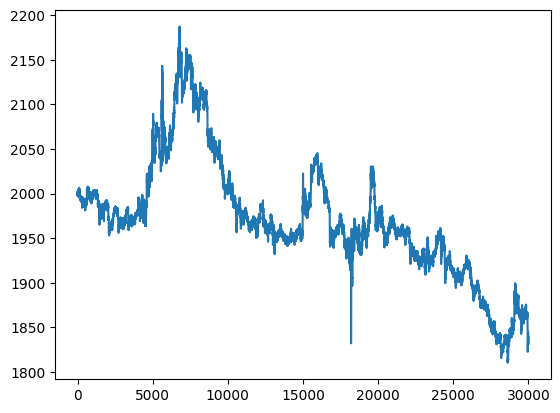

In [172]:
plt.plot(squid_ink)

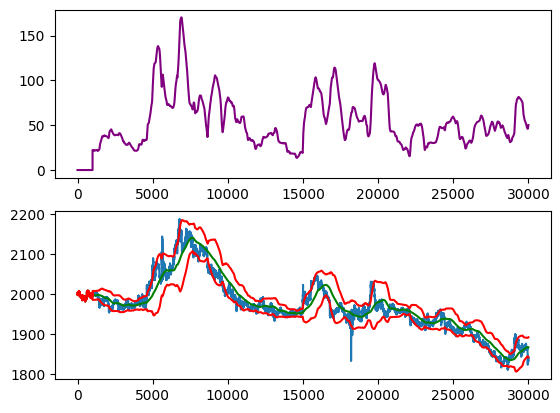

In [188]:
plt.subplot(2,1,1).plot(band_widths,color="purple")
plt.subplot(2,1,2).plot(squid_ink)
plt.subplot(2,1,2).plot(sma,color="green")
plt.subplot(2,1,2).plot(up_stds,color="red")
plt.subplot(2,1,2).plot(down_stds,color="red")
# plt.subplot(3,1,2).plot(band_widths,color="purple")

# plt.subplot(3,1,3).plot(long_ma,color="pink")
# plt.subplot(3,1,3).plot(ma,color="black")
# plt.subplot(3,1,3).plot([a-b for a,b in zip(long_ma,ma)],color="pink")

In [189]:
correlation_np = np.corrcoef(squid_ink, band_widths)[0, 1]
print(f"NumPy correlation: {correlation_np}")

NumPy correlation: 0.4608611813368042


In [157]:
squid_ink

[2000.0,
 2000.0,
 1998.5,
 1998.5,
 1998.0,
 1999.5,
 1999.0,
 2000.5,
 2002.5,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 1997.0,
 1998.5,
 1999.0,
 1999.0,
 1998.0,
 2001.5,
 2000.0,
 2001.5,
 2000.5,
 1999.5,
 2000.5,
 2001.0,
 2001.5,
 2001.0,
 2001.5,
 2002.5,
 2002.5,
 2002.5,
 2000.5,
 2000.5,
 2001.5,
 2001.5,
 2002.0,
 2001.5,
 2002.5,
 2000.0,
 2001.5,
 2000.0,
 2000.5,
 2000.5,
 1999.0,
 1999.5,
 2000.0,
 1997.5,
 1999.5,
 1998.5,
 1997.5,
 1999.0,
 1999.5,
 1999.5,
 2000.5,
 2001.5,
 2001.0,
 1997.5,
 1997.5,
 1997.0,
 1996.5,
 1997.0,
 1997.5,
 1999.0,
 1999.5,
 2001.5,
 2001.0,
 2002.5,
 2003.5,
 2002.5,
 2000.0,
 1999.5,
 2001.5,
 2001.5,
 2004.0,
 2004.5,
 2004.5,
 2003.5,
 2005.0,
 2005.5,
 2004.5,
 2003.5,
 2003.0,
 2003.0,
 2003.5,
 2002.5,
 2004.5,
 2005.0,
 2004.5,
 2003.5,
 2003.0,
 2004.0,
 2003.5,
 2005.0,
 2003.0,
 2002.5,
 2003.0,
 2002.5,
 2003.5,
 2003.0,
 2003.5,
 2004.5,
 2005.0,
 2006.5,
 2005.5,
 2006.0,
 2005.0,
 2005.5,
 2004.5,
 2005.5,
 2005.5,
 

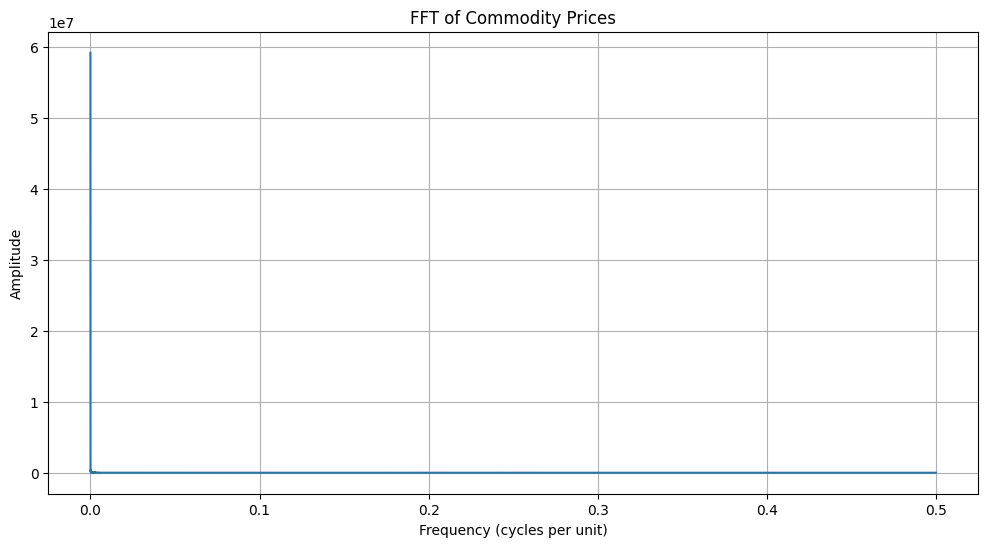

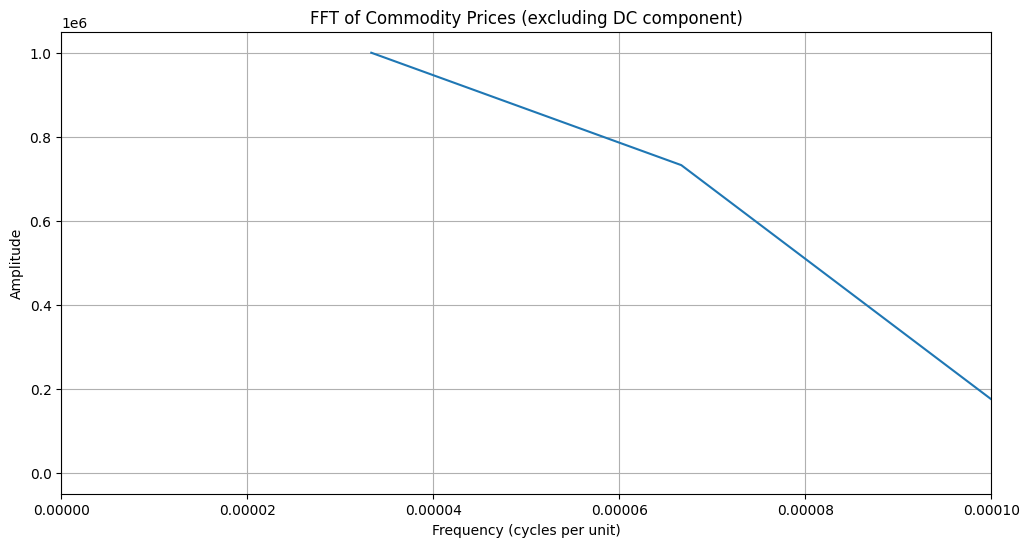

In [161]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

# Assuming your commodity data is in a list named 'commodity_prices'
commodity_prices = squid_ink  # Replace with your actual data

# Perform the FFT
fft_result = fftpack.fft(commodity_prices)
# Get the amplitudes (magnitude)
amplitudes = np.abs(fft_result)

# Get the corresponding frequencies
# Note: You'll need to know your sampling frequency/interval
# For example, if data is daily, sampling_freq = 1/day = 1
n_samples = len(commodity_prices)
sample_spacing = 1  # Adjust based on your data intervals (e.g., 1 for daily, 1/12 for monthly)
frequencies = fftpack.fftfreq(n_samples, sample_spacing)

# We only need the positive frequencies (first half of the data)
positive_freq_indices = np.where(frequencies >= 0)
positive_frequencies = frequencies[positive_freq_indices]
positive_amplitudes = amplitudes[positive_freq_indices]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(positive_frequencies, positive_amplitudes, '-')
plt.xlabel('Frequency (cycles per unit)')
plt.ylabel('Amplitude')
plt.title('FFT of Commodity Prices')
plt.grid(True)

# To see dominant frequencies more clearly, you might want to zoom in
plt.figure(figsize=(12, 6))
# Exclude the DC component (0 frequency) which is often very large
plt.plot(positive_frequencies[1:], positive_amplitudes[1:], '-')
plt.xlabel('Frequency (cycles per unit)')
plt.ylabel('Amplitude')
plt.title('FFT of Commodity Prices (excluding DC component)')
plt.grid(True)
plt.xlim(0,0.0001)
plt.show()

In [162]:
1/0.000035

28571.428571428572

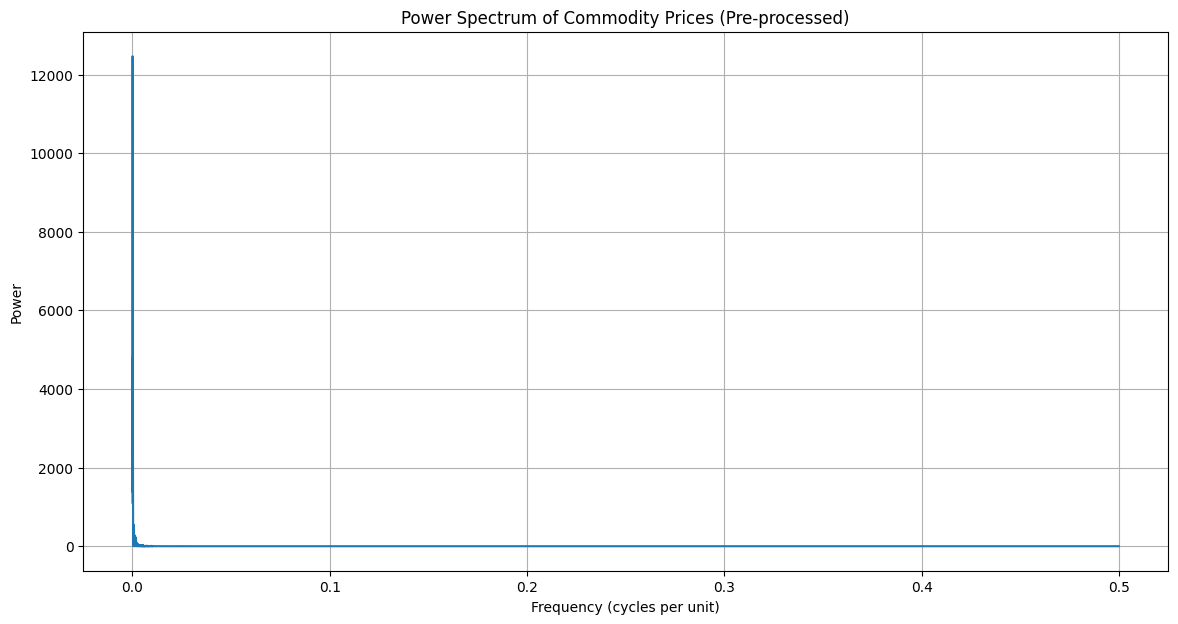

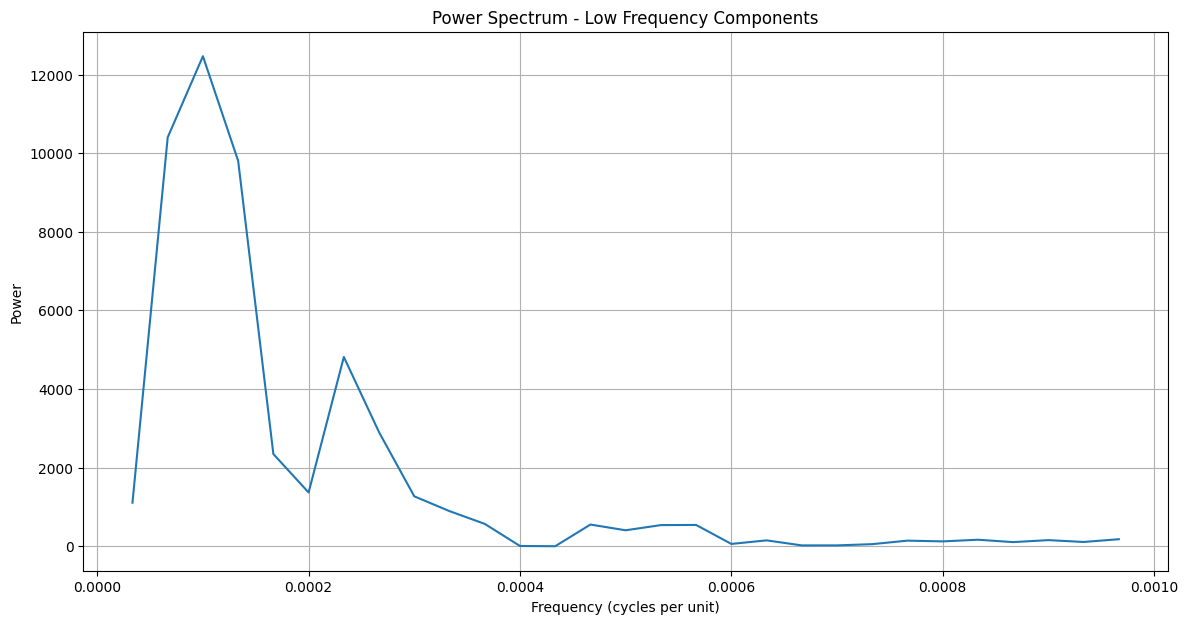

In [169]:
import numpy as np
from scipy import fftpack, signal
import matplotlib.pyplot as plt

# Assuming your commodity data is in a list
prices = np.array(commodity_prices)

# Step 1: Log transform the data (optional)
# This helps normalize the data and reduce the impact of large price movements
log_prices = np.log(prices)

# Step 2: Detrend the data (remove linear trend)
# This removes the overall upward/downward movement
detrended_prices = signal.detrend(log_prices)

# Step 3: Apply a window function
# This reduces spectral leakage at the edges of your data window
window = signal.windows.hann(len(detrended_prices))
windowed_prices = detrended_prices * window

# Now perform the FFT on the pre-processed data
fft_result = fftpack.fft(windowed_prices)
amplitudes = np.abs(fft_result)

# Get the corresponding frequencies
n_samples = len(windowed_prices)
sample_spacing = 1  # Adjust based on your data intervals
frequencies = fftpack.fftfreq(n_samples, sample_spacing)

# Calculate power spectrum (square of amplitudes)
power_spectrum = amplitudes**2

# We only need the positive frequencies
positive_freq_indices = np.where(frequencies >= 0)
positive_frequencies = frequencies[positive_freq_indices]
positive_power = power_spectrum[positive_freq_indices]

# Plot the results with a more focused x-axis range
plt.figure(figsize=(14, 7))
plt.plot(positive_frequencies[1:], positive_power[1:], '-')
plt.xlabel('Frequency (cycles per unit)')
plt.ylabel('Power')
plt.title('Power Spectrum of Commodity Prices (Pre-processed)')
plt.grid(True)

# Zoom in on the low-frequency range
plt.figure(figsize=(14, 7))
# Find upper limit index for the zoom (e.g., frequencies up to 0.005)
zoom_limit = np.searchsorted(positive_frequencies, 0.001)
plt.plot(positive_frequencies[1:zoom_limit], positive_power[1:zoom_limit], '-')
plt.xlabel('Frequency (cycles per unit)')
plt.ylabel('Power')
plt.title('Power Spectrum - Low Frequency Components')
plt.grid(True)
plt.show()

In [167]:
1/0.0001

10000.0

In [168]:
# Find peaks in the power spectrum
peak_indices = signal.find_peaks(positive_power[1:zoom_limit], height=np.max(positive_power[1:zoom_limit])/10)[0]
peak_frequencies = positive_frequencies[1:][peak_indices]
peak_periods = 1/peak_frequencies

print("Dominant cycle periods:")
for freq, period in zip(peak_frequencies, peak_periods):
    print(f"Frequency: {freq:.6f} cycles/unit -> Period: {period:.1f} units")

Dominant cycle periods:
Frequency: 0.000100 cycles/unit -> Period: 10000.0 units
Frequency: 0.000233 cycles/unit -> Period: 4285.7 units


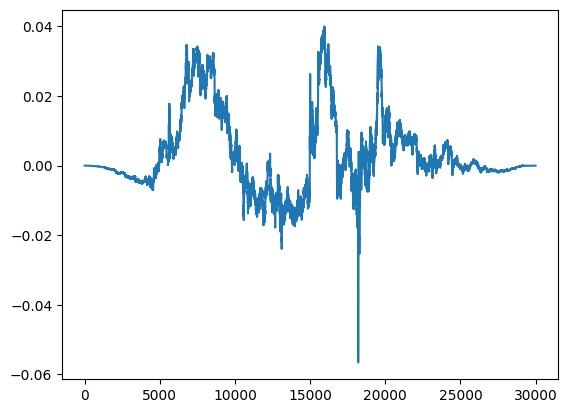

In [171]:
plt.plot(windowed_prices)

In [170]:
import numpy as np
from scipy import fftpack, signal
import matplotlib.pyplot as plt

# Assuming you have your pre-processed price data in an array called 'processed_prices'
# And you've already identified peak_indices from your power spectrum

# Perform the FFT
fft_result = fftpack.fft(windowed_prices)
n_samples = len(windowed_prices)
frequencies = fftpack.fftfreq(n_samples, sample_spacing)

# Get both magnitude and phase
amplitudes = np.abs(fft_result)  # Magnitude
phases = np.angle(fft_result)    # Phase in radians

# For the dominant frequencies you identified
dominant_indices = peak_indices + 1  # +1 because peak_indices was from positive_power[1:]
dominant_frequencies = frequencies[dominant_indices]
dominant_amplitudes = amplitudes[dominant_indices] / (n_samples/2)  # Normalize by N/2
dominant_phases = phases[dominant_indices]

# Print the results
print("Dominant cycles:")
for i, (freq, amp, phase) in enumerate(zip(dominant_frequencies, dominant_amplitudes, dominant_phases)):
    period = 1/freq if freq != 0 else float('inf')
    print(f"Cycle {i+1}: Period = {period:.2f}, Amplitude = {amp:.4f}, Phase = {phase:.4f} radians")

Dominant cycles:
Cycle 1: Period = 10000.00, Amplitude = 0.0074, Phase = 1.4311 radians
Cycle 2: Period = 4285.71, Amplitude = 0.0046, Phase = 1.6211 radians


In [183]:
a_reconstruction = [-200*np.sin((2*np.pi/10000)*i) +2000 for i in range(len(squid_ink))]
b_reconstruction = [-200*np.sin((2*np.pi/4300)*i) +2000 for i in range(len(squid_ink))]
c_reconstruction = [(a+b)/2 for a,b in zip(a_reconstruction,b_reconstruction)]

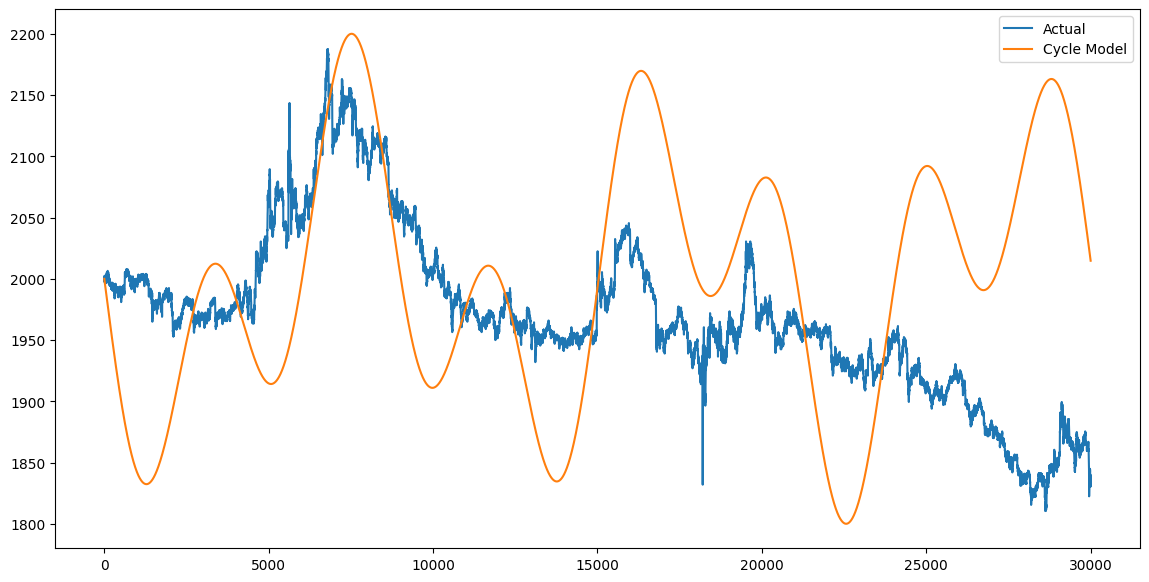

In [184]:

# Plot against actual data to see fit
plt.figure(figsize=(14, 7))
plt.plot([*range(len(squid_ink))], squid_ink, label='Actual')
plt.plot([*range(len(squid_ink))],c_reconstruction , label='Cycle Model')
plt.legend()